In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Coursera_reviews.csv')

In [6]:
df.head(10)

reviews       reviewers  \
0  Pretty dry, but I was able to pass with just t...     By Robert S   
1  would be a better experience if the video and ...  By Gabriel E R   
2  Information was perfect! The program itself wa...      By Jacob D   
3  A few grammatical mistakes on test made me do ...       By Dale B   
4  Excellent course and the training provided was...       By Sean G   
5  Some of the quizzes contained material not exp...     By Daniel F   
6  Solid presentation all the way through. I real...      By Logan D   
7  Probably the best certification course I've ta...     By Luis M C   
8  The ProctorU.com system took 2 times the amoun...      By scott w   
9  Covered all of the required information in an ...       By Ryan H   

   date_reviews  rating                 course_id  
0  Feb 12, 2020       4  google-cbrs-cpi-training  
1  Sep 28, 2020       4  google-cbrs-cpi-training  
2  Apr 08, 2020       4  google-cbrs-cpi-training  
3  Feb 24, 2020       4  google-cbrs-cpi-training  
4  Jun 18, 2020       4  google-cbrs-cpi-training  
5  Dec 23, 2019       4  google-cbrs-cpi-training  
6  Sep 03, 2020       5  google-cbrs-cpi-training  
7  Nov 21, 2019       5  google-cbrs-cpi-training  
8  Sep 28, 2020       5  google-cbrs-cpi-training  
9  Aug 26, 2019       5  google-cbrs-cpi-training

In [7]:
df.tail(10)

reviews        reviewers  date_reviews  rating            course_id
1454701      :D    By PRATIK R P  May 12, 2020       5  computer-networking
1454702      A+        By John h  Sep 05, 2019       5  computer-networking
1454703       .     By Sathish M  Oct 05, 2020       5  computer-networking
1454704       5        By Ei T S  Oct 03, 2020       5  computer-networking
1454705       .      By Mhee A G  Sep 27, 2020       5  computer-networking
1454706       g     By Brijesh K  Aug 25, 2020       5  computer-networking
1454707       .    By Vasavi V M  Jul 02, 2020       5  computer-networking
1454708       .     By Drishti D  Jun 20, 2020       5  computer-networking
1454709       .  By FAUSTINE F K  Jun 07, 2020       5  computer-networking
1454710       G        By Reza S  Aug 12, 2018       5  computer-networking

In [8]:
# Replace date_reviews column with 'month' and 'year' 
df['year'] = pd.to_datetime(df['date_reviews']).dt.year
df['month'] = pd.to_datetime(df['date_reviews']).dt.month

df = df.drop('date_reviews', 1)

<ipython-input-8-8176cddb2242>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('date_reviews', 1)


In [9]:
df.head(5)

reviews       reviewers  rating  \
0  Pretty dry, but I was able to pass with just t...     By Robert S       4   
1  would be a better experience if the video and ...  By Gabriel E R       4   
2  Information was perfect! The program itself wa...      By Jacob D       4   
3  A few grammatical mistakes on test made me do ...       By Dale B       4   
4  Excellent course and the training provided was...       By Sean G       4   

                  course_id  year  month  
0  google-cbrs-cpi-training  2020      2  
1  google-cbrs-cpi-training  2020      9  
2  google-cbrs-cpi-training  2020      4  
3  google-cbrs-cpi-training  2020      2  
4  google-cbrs-cpi-training  2020      6

In [10]:
df.tail(5)

reviews        reviewers  rating            course_id  year  month
1454706       g     By Brijesh K       5  computer-networking  2020      8
1454707       .    By Vasavi V M       5  computer-networking  2020      7
1454708       .     By Drishti D       5  computer-networking  2020      6
1454709       .  By FAUSTINE F K       5  computer-networking  2020      6
1454710       G        By Reza S       5  computer-networking  2018      8

# Data Cleaning and Pre-processing

In [8]:
#! pip install texthero

In [11]:
import texthero as hero

In [12]:
df['clean_reviews'] = hero.clean(df['reviews'])

C:\Users\seohy\anaconda3\lib\site-packages\texthero\preprocessing.py:72: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(pattern, symbols)
C:\Users\seohy\anaconda3\lib\site-packages\texthero\preprocessing.py:131: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(rf"([{string.punctuation}])+", symbol)


In [13]:
df[['reviews', 'clean_reviews']].head(10)

reviews  \
0  Pretty dry, but I was able to pass with just t...   
1  would be a better experience if the video and ...   
2  Information was perfect! The program itself wa...   
3  A few grammatical mistakes on test made me do ...   
4  Excellent course and the training provided was...   
5  Some of the quizzes contained material not exp...   
6  Solid presentation all the way through. I real...   
7  Probably the best certification course I've ta...   
8  The ProctorU.com system took 2 times the amoun...   
9  Covered all of the required information in an ...   

                                       clean_reviews  
0  pretty dry able pass two complete watches happ...  
1  would better experience video screen shots wou...  
2  information perfect program little annoying wa...  
3     grammatical mistakes test made double take bad  
4  excellent course training provided detailed ea...  
5  quizzes contained material explicitly covered ...  
6  solid presentation way really appreciated inte...  
7  probably best certification course taken respe...  
8  proctoru com system took times amount time spe...  
9  covered required information easy understand w...

In [14]:
df[['reviews', 'clean_reviews']].tail(10)

reviews clean_reviews
1454701      :D              
1454702      A+              
1454703       .              
1454704       5              
1454705       .              
1454706       g             g
1454707       .              
1454708       .              
1454709       .              
1454710       G             g

In [15]:
df_clean = df[['clean_reviews','rating','reviewers','course_id','year','month']]

In [16]:
df_clean.head(10)

clean_reviews  rating       reviewers  \
0  pretty dry able pass two complete watches happ...       4     By Robert S   
1  would better experience video screen shots wou...       4  By Gabriel E R   
2  information perfect program little annoying wa...       4      By Jacob D   
3     grammatical mistakes test made double take bad       4       By Dale B   
4  excellent course training provided detailed ea...       4       By Sean G   
5  quizzes contained material explicitly covered ...       4     By Daniel F   
6  solid presentation way really appreciated inte...       5      By Logan D   
7  probably best certification course taken respe...       5     By Luis M C   
8  proctoru com system took times amount time spe...       5      By scott w   
9  covered required information easy understand w...       5       By Ryan H   

                  course_id  year  month  
0  google-cbrs-cpi-training  2020      2  
1  google-cbrs-cpi-training  2020      9  
2  google-cbrs-cpi-training  2020      4  
3  google-cbrs-cpi-training  2020      2  
4  google-cbrs-cpi-training  2020      6  
5  google-cbrs-cpi-training  2019     12  
6  google-cbrs-cpi-training  2020      9  
7  google-cbrs-cpi-training  2019     11  
8  google-cbrs-cpi-training  2020      9  
9  google-cbrs-cpi-training  2019      8

In [17]:
df_clean.tail(10)             

clean_reviews  rating        reviewers            course_id  year  \
1454701                     5    By PRATIK R P  computer-networking  2020   
1454702                     5        By John h  computer-networking  2019   
1454703                     5     By Sathish M  computer-networking  2020   
1454704                     5        By Ei T S  computer-networking  2020   
1454705                     5      By Mhee A G  computer-networking  2020   
1454706             g       5     By Brijesh K  computer-networking  2020   
1454707                     5    By Vasavi V M  computer-networking  2020   
1454708                     5     By Drishti D  computer-networking  2020   
1454709                     5  By FAUSTINE F K  computer-networking  2020   
1454710             g       5        By Reza S  computer-networking  2018   

         month  
1454701      5  
1454702      9  
1454703     10  
1454704     10  
1454705      9  
1454706      8  
1454707      7  
1454708      6  
1454709      6  
1454710      8

In [18]:
df_clean.shape

(1454711, 6)

In [23]:
#df_clean = df_clean.replace('', np.nan)

In [24]:
#df_clean.tail(5)

In [19]:
top_words = hero.visualization.top_words(df_clean['clean_reviews']).head(50)
import plotly.express as px
fig = px.bar(top_words)
fig.show()

C:\Users\seohy\anaconda3\lib\site-packages\texthero\visualization.py:181: FutureWarning: The default value of regex will change from True to False in a future version.
  s.str.replace(


In [20]:
top_words.head(100)

course         988333
great          266869
good           265086
really         167699
learning       162801
well           126445
thank          124433
lot            120152
excellent      120126
learn          117638
de             112341
much            95964
would           89468
understand      89062
curso           86568
easy            81830
thanks          78183
like            76118
interesting     75782
learned         73186
way             72656
useful          71879
knowledge       71693
one             71142
que             70339
also            65554
helpful         64592
best            64304
python          63218
data            62990
muy             61725
amazing         61098
concepts        61019
content         60427
recommend       59351
time            59081
programming     58655
experience      58181
assignments     56663
nice            55330
videos          55082
courses         53114
material        52760
get             52507
enjoyed         52035
en        

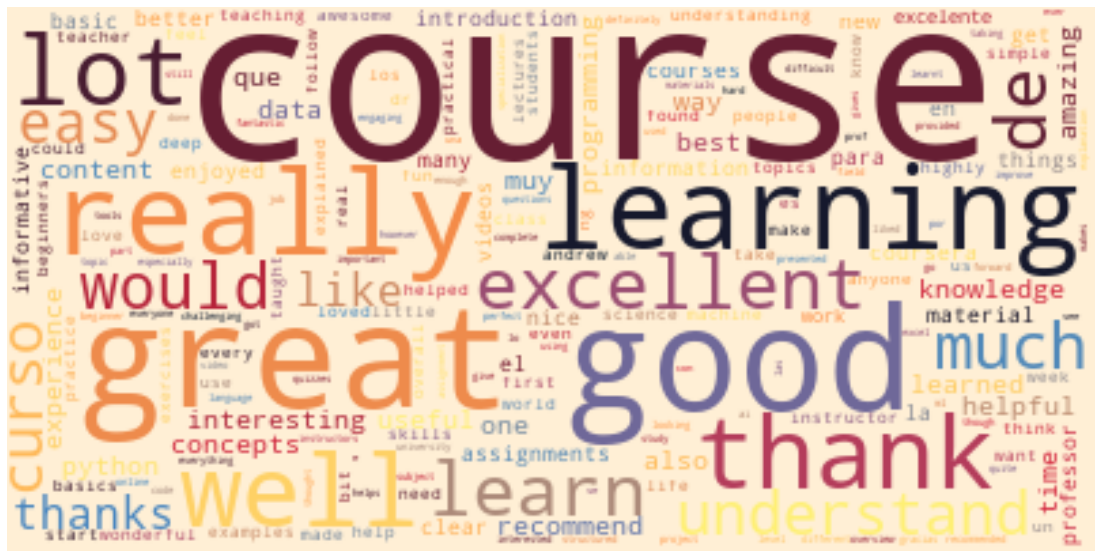

In [21]:
word_cloud = hero.visualization.wordcloud(df_clean['clean_reviews'])

In [22]:
# We want to remove frequently occurring words which may not have meaning for analysis
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
#add a list of stopwords to the stopwords
custom_stopwords = default_stopwords.union(set(["coursera","course","really","would","also","de","curso","que","muy","en","el","la"]))
# Call remove_stopwords and pass the custom_stopwords list
df_clean['clean_reviews'] = hero.remove_stopwords(df_clean['clean_reviews'], custom_stopwords)

<ipython-input-22-141e6f137af0>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
top_words2 = hero.visualization.top_words(df_clean['clean_reviews']).head(25)
fig = px.bar(top_words2)
fig.show()

C:\Users\seohy\anaconda3\lib\site-packages\texthero\visualization.py:181: FutureWarning:

The default value of regex will change from True to False in a future version.



In [24]:
top_words2.head(50)

great          266869
good           265086
learning       162801
well           126451
thank          124433
lot            120152
excellent      120126
learn          117638
much            95964
understand      89062
easy            81830
thanks          78189
like            76118
interesting     75782
learned         73186
way             72656
useful          71879
knowledge       71693
one             71142
helpful         64592
best            64304
python          63218
data            62990
amazing         61098
concepts        61019
Name: clean_reviews, dtype: int64

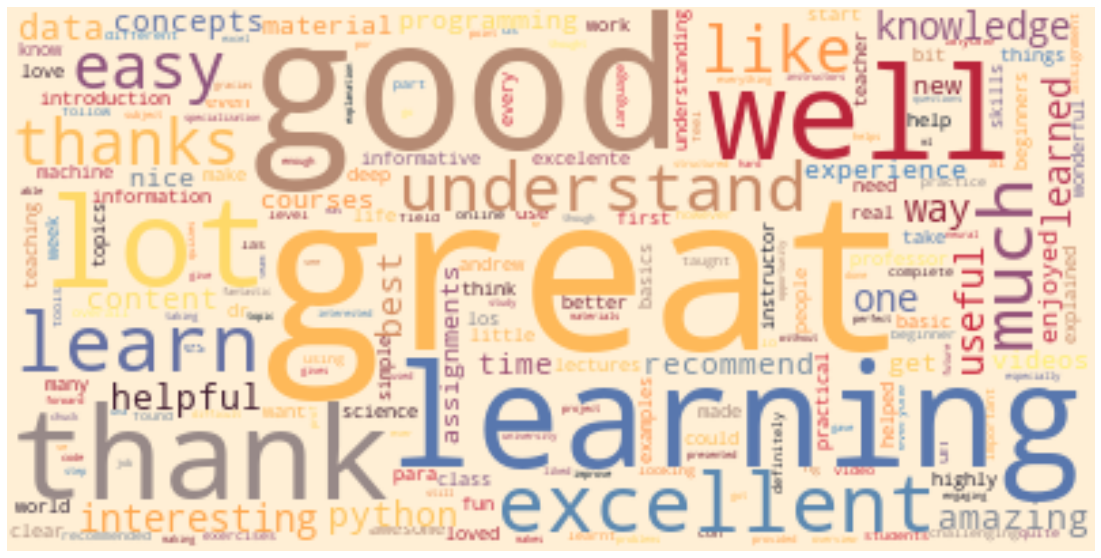

In [25]:
word_cloud2 = hero.visualization.wordcloud(df_clean['clean_reviews'])

# Sentiment Analysis

In [26]:
df_clean.insert(2, 'rating_sentiment','sentiment')

In [27]:
df_clean['rating_sentiment'] = np.where(df_clean['rating'] > 3, 'Positive', df_clean['rating_sentiment'])

In [28]:
df_clean['rating_sentiment'] = np.where(df_clean['rating'] == 3, 'Neutral', df_clean['rating_sentiment'])

In [29]:
df_clean['rating_sentiment'] = np.where(df_clean['rating'] == 2, 'Negative', df_clean['rating_sentiment'])

In [30]:
df_clean['rating_sentiment'] = np.where(df_clean['rating'] == 1, 'Negative', df_clean['rating_sentiment'])

In [32]:
df_clean.head(5)

clean_reviews  rating rating_sentiment  \
0  pretty dry able pass two complete watches happ...       4         Positive   
1   better experience video screen shots  sho sid...       4         Positive   
2  information perfect program little annoying wa...       4         Positive   
3     grammatical mistakes test made double take bad       4         Positive   
4  excellent  training provided detailed easy follow       4         Positive   

        reviewers                 course_id  year  month  
0     By Robert S  google-cbrs-cpi-training  2020      2  
1  By Gabriel E R  google-cbrs-cpi-training  2020      9  
2      By Jacob D  google-cbrs-cpi-training  2020      4  
3       By Dale B  google-cbrs-cpi-training  2020      2  
4       By Sean G  google-cbrs-cpi-training  2020      6

In [33]:
df_clean.tail(5)

clean_reviews  rating rating_sentiment        reviewers  \
1454706             g       5         Positive     By Brijesh K   
1454707                     5         Positive    By Vasavi V M   
1454708                     5         Positive     By Drishti D   
1454709                     5         Positive  By FAUSTINE F K   
1454710             g       5         Positive        By Reza S   

                   course_id  year  month  
1454706  computer-networking  2020      8  
1454707  computer-networking  2020      7  
1454708  computer-networking  2020      6  
1454709  computer-networking  2020      6  
1454710  computer-networking  2018      8

In [34]:
df_clean['rating_sentiment'].value_counts()

Positive    1372866
Neutral       48303
Negative      33542
Name: rating_sentiment, dtype: int64

In [35]:
import matplotlib.ticker as tick
import seaborn as sns

#% matplotlib inline

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

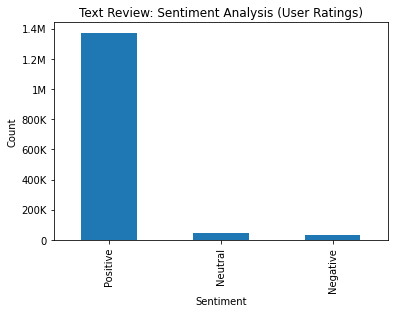

In [36]:
df_clean['rating_sentiment'].value_counts().plot(kind='bar')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.xlabel('Sentiment'); plt.ylabel('Count'); plt.title('Text Review: Sentiment Analysis (User Ratings)');
plt.savefig("distribution of rating sentiment.png",
                    format='png',dpi=150)

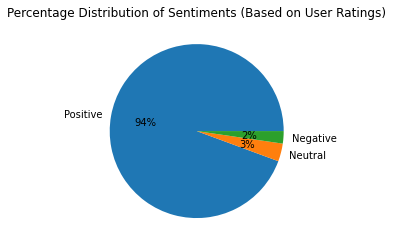

In [37]:
df_clean['rating_sentiment'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Percentage Distribution of Sentiments (Based on User Ratings)")
plt.legend
plt.ylabel("")
plt.savefig("distribution of rating sentiment pie chart.png",
                    format='png',dpi=150, bbox_inches='tight')

# Sentiment Analysis with TextBlob

In [43]:
#! pip install -U textblob

In [38]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import re

In [39]:
def getSubjectivity(clean_reviews):
    return TextBlob(clean_reviews).sentiment.subjectivity

In [40]:
def getPolarity(clean_reviews):
        return TextBlob(clean_reviews).sentiment.polarity

In [41]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [42]:
df_clean['clean_reviews'].head(5)

0    pretty dry able pass two complete watches happ...
1     better experience video screen shots  sho sid...
2    information perfect program little annoying wa...
3       grammatical mistakes test made double take bad
4    excellent  training provided detailed easy follow
Name: clean_reviews, dtype: object

In [43]:
df_clean['clean_reviews'] = df_clean['clean_reviews'].astype(str)

In [44]:
df_clean['TextBlob_Polarity'] = df_clean['clean_reviews'].apply(getPolarity) 

In [45]:
df_clean['TextBlob_sentiment'] = df_clean['TextBlob_Polarity'].apply(analysis)

In [46]:
df_clean.head(10)

clean_reviews  rating rating_sentiment  \
0  pretty dry able pass two complete watches happ...       4         Positive   
1   better experience video screen shots  sho sid...       4         Positive   
2  information perfect program little annoying wa...       4         Positive   
3     grammatical mistakes test made double take bad       4         Positive   
4  excellent  training provided detailed easy follow       4         Positive   
5     quizzes contained material explicitly covered        4         Positive   
6  solid presentation way  appreciated intermitte...       5         Positive   
7  probably best certification  taken respect  pl...       5         Positive   
8  proctoru com system took times amount time spe...       5         Positive   
9  covered required information easy understand w...       5         Positive   

        reviewers                 course_id  year  month  TextBlob_Polarity  \
0     By Robert S  google-cbrs-cpi-training  2020      2           0.148485   
1  By Gabriel E R  google-cbrs-cpi-training  2020      9           0.500000   
2      By Jacob D  google-cbrs-cpi-training  2020      4           0.253125   
3       By Dale B  google-cbrs-cpi-training  2020      2          -0.350000   
4       By Sean G  google-cbrs-cpi-training  2020      6           0.611111   
5     By Daniel F  google-cbrs-cpi-training  2019     12           0.000000   
6      By Logan D  google-cbrs-cpi-training  2020      9          -0.060000   
7     By Luis M C  google-cbrs-cpi-training  2019     11           0.507143   
8      By scott w  google-cbrs-cpi-training  2020      9          -0.133333   
9       By Ryan H  google-cbrs-cpi-training  2019      8           0.493333   

  TextBlob_sentiment  
0           Positive  
1           Positive  
2           Positive  
3           Negative  
4           Positive  
5            Neutral  
6           Negative  
7           Positive  
8           Negative  
9           Positive

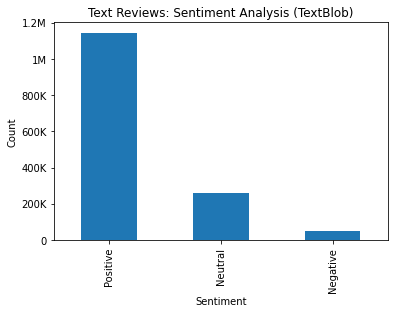

In [47]:
df_clean['TextBlob_sentiment'].value_counts().plot(kind='bar')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.xlabel('Sentiment'); plt.ylabel('Count'); plt.title('Text Reviews: Sentiment Analysis (TextBlob)');
plt.savefig("distribution of TextBlob sentiment.png",
                    format='png',dpi=150, bbox_inches='tight')

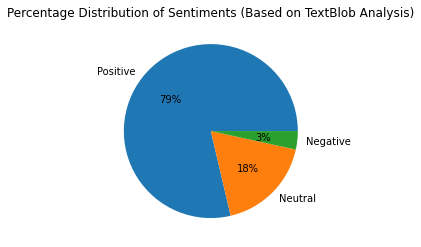

In [48]:
df_clean['TextBlob_sentiment'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Percentage Distribution of Sentiments (Based on TextBlob Analysis)")
plt.ylabel("")
plt.savefig("distribution of Textblob sentiment pie chart.png",
                    format='png',dpi=150, bbox_inches='tight')

In [49]:
df_clean['TextBlob_sentiment'].value_counts()

Positive    1144323
Neutral      260745
Negative      49643
Name: TextBlob_sentiment, dtype: int64

# Comparison of Sentiment (User Ratings vs TextBlob)

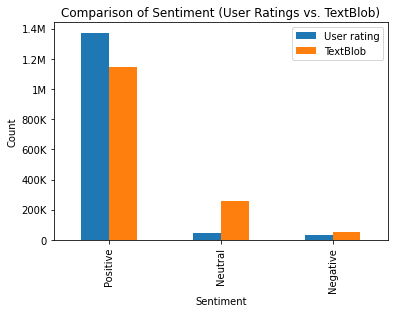

In [50]:
df_compare = pd.DataFrame({
    'Sentiment': ['Positive', 'Neutral', 'Negative'],
    'User rating': [1372866, 48303, 33542],
    'TextBlob': [1144323, 260745, 49643]
})
  
df_compare.plot(x="Sentiment", y=["User rating", "TextBlob"], kind="bar")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.xlabel('Sentiment'); plt.ylabel('Count'); plt.title('Comparison of Sentiment (User Ratings vs. TextBlob)');
plt.savefig("rating vs TextBlob sentiment.png",
                    format='png',dpi=150, bbox_inches='tight')

In [51]:
comparison_column = np.where(df_clean['rating_sentiment'] == df_clean['TextBlob_sentiment'], True, False)
df_clean['rating_vs_TB'] = comparison_column
df_clean['rating_vs_TB'].value_counts()

True     1118644
False     336067
Name: rating_vs_TB, dtype: int64

In [52]:
total_comparison = df_clean['rating_vs_TB'].index
print(total_comparison)

RangeIndex(start=0, stop=1454711, step=1)


In [53]:
accuracy_TB = 1118644/1454711
print('Accuracy Score for TextBlob: ', accuracy_TB*100,'%',sep='')

Accuracy Score for TextBlob: 76.89802304375233%


# Sentiment Analysis with Machine Learning

In [54]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Training Model using User Ratings as Labels (5-class)

In [55]:
X = df_clean.clean_reviews
y = df_clean.rating

In [56]:
#Using CountVectorizer to convert text into tokens/features
vect = CountVectorizer(ngram_range = (1,1), max_df = .80, min_df = 4)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.25)

In [58]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train) 
X_test_dtm = vect.transform(X_test)

In [59]:
#Perfomance using Naive Bayes Model
NB = MultinomialNB()
%time NB.fit(X_train_dtm, y_train)
y_pred_nb = NB.predict(X_test_dtm)

print('\nNaive Bayes')
print(metrics.classification_report(y_test, y_pred_nb, digits=3))
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred_nb), sep = '\n')

Wall time: 865 ms

Naive Bayes
              precision    recall  f1-score   support

           1      0.439     0.449     0.444      4320
           2      0.368     0.249     0.297      4003
           3      0.354     0.306     0.328     12098
           4      0.468     0.324     0.383     56819
           5      0.871     0.933     0.901    286438

    accuracy                          0.804    363678
   macro avg      0.500     0.452     0.471    363678
weighted avg      0.780     0.804     0.789    363678

Confusion Matrix: 
[[  1941    298    578    516    987]
 [   366    997    885    880    875]
 [   368    352   3698   3886   3794]
 [   644    504   3352  18431  33888]
 [  1102    559   1928  15654 267195]]


In [72]:
#Performance using Logistic Regression Model
LR = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000, warm_start=True)
%time LR.fit(X_train_dtm, y_train)
y_pred_lr = LR.predict(X_test_dtm)

print('\nLogistic Regression')
print(metrics.classification_report(y_test, y_pred_lr, digits=3))
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred_lr), sep = '\n')

Wall time: 23min 55s

Logistic Regression
              precision    recall  f1-score   support

           1      0.333     0.807     0.472      4320
           2      0.260     0.706     0.380      4003
           3      0.267     0.619     0.373     12098
           4      0.339     0.506     0.406     56819
           5      0.928     0.743     0.825    286438

    accuracy                          0.702    363678
   macro avg      0.425     0.676     0.491    363678
weighted avg      0.799     0.702     0.736    363678

Confusion Matrix: 
[[  3485    303    346    109     77]
 [   381   2827    536    190     69]
 [   817   1178   7492   2027    584]
 [  1699   2310   8187  28724  15899]
 [  4079   4241  11462  53726 212930]]


In [74]:
#Performance using SVM Model
SVM = LinearSVC(dual=True, max_iter=4000)
%time SVM.fit(X_train_dtm, y_train)
y_pred_svm = SVM.predict(X_test_dtm)
print('\nSupport Vector Machine')
print(metrics.classification_report(y_test, y_pred_svm, digits=3))
print('Confusion Matrix for SVM Model: ',metrics.confusion_matrix(y_test,y_pred_svm), sep = '\n')

C:\Users\seohy\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Wall time: 1h 7min 32s

Support Vector Machine
              precision    recall  f1-score   support

           1      0.769     0.566     0.652      4320
           2      0.785     0.367     0.500      4003
           3      0.696     0.256     0.374     12098
           4      0.648     0.256     0.368     56819
           5      0.849     0.983     0.911    286438

    accuracy                          0.834    363678
   macro avg      0.749     0.486     0.561    363678
weighted avg      0.811     0.834     0.801    363678

Confusion Matrix for SVM Model: 
[[  2445     86    130    251   1408]
 [   249   1468    285    528   1473]
 [   239    161   3093   2670   5935]
 [   164     92    657  14573  41333]
 [    84     62    282   4463 281547]]


# Testing max iterations

In [68]:
#Accuracy using Logistic Regression Model
LR = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=2000, warm_start=True)
%time LR.fit(X_train_dtm, y_train)
y_pred_lr = LR.predict(X_test_dtm)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='micro')
recall_lr = recall_score(y_test, y_pred_lr, average='micro')
f1_lr = f1_score(y_test, y_pred_lr, average='micro')

print('\nLogistic Regression')
print('Accuracy: %.3f' % accuracy_lr)
print('Precision: %.3f' % precision_lr)
print('Recall: %.3f' % recall_lr)
print('F1: %.3f' % f1_lr)

print('Accuracy Score for Logistic Regression Model: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix for Logistic Regression Model: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Wall time: 35min 17s

Logistic Regression
Accuracy Score for Logistic Regression Model: 70.2387826593855%
Confusion Matrix for Logistic Regression Model: 
[[  3485    303    346    109     77]
 [   381   2827    536    190     69]
 [   819   1178   7491   2023    587]
 [  1700   2312   8185  28721  15901]
 [  4083   4239  11467  53730 212919]]


In [69]:
#Accuracy using Logistic Regression Model
LR = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=4000, warm_start=True)
%time LR.fit(X_train_dtm, y_train)
y_pred = LR.predict(X_test_dtm)

print('\nLogistic Regression')
print('Accuracy: %.3f' % accuracy_lr)
print('Precision: %.3f' % precision_lr)
print('Recall: %.3f' % recall_lr)
print('F1: %.3f' % f1_lr)

print('Accuracy Score for Logistic Regression Model: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix for Logistic Regression Model: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Wall time: 35min

Logistic Regression
Accuracy Score for Logistic Regression Model: 70.2387826593855%
Confusion Matrix for Logistic Regression Model: 
[[  3485    303    346    109     77]
 [   381   2827    536    190     69]
 [   819   1178   7491   2023    587]
 [  1700   2312   8185  28721  15901]
 [  4083   4239  11467  53730 212919]]


In [70]:
#Accuracy using Logistic Regression Model
LR = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000, warm_start=True)
%time LR.fit(X_train_dtm, y_train)
y_pred = LR.predict(X_test_dtm)

print('\nLogistic Regression')
print('Accuracy: %.3f' % accuracy_lr)
print('Precision: %.3f' % precision_lr)
print('Recall: %.3f' % recall_lr)
print('F1: %.3f' % f1_lr)

print('Accuracy Score for Logistic Regression Model: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix for Logistic Regression Model: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Wall time: 26min 18s

Logistic Regression
Accuracy Score for Logistic Regression Model: 70.2387826593855%
Confusion Matrix for Logistic Regression Model: 
[[  3485    303    346    109     77]
 [   381   2827    536    190     69]
 [   819   1178   7491   2023    587]
 [  1700   2312   8185  28721  15901]
 [  4083   4239  11467  53730 212919]]


In [71]:
#Accuracy using SVM Model
SVM = LinearSVC(dual=True, max_iter=2000)
%time SVM.fit(X_train_dtm, y_train)
y_pred = SVM.predict(X_test_dtm)
print('\nSupport Vector Machine')
print('Accuracy Score for SVM Model: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix for SVM Model: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

C:\Users\seohy\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Wall time: 31min 18s

Support Vector Machine
Accuracy Score for SVM Model: 83.35038138133184%
Confusion Matrix for SVM Model: 
[[  2444     86    131    251   1408]
 [   249   1468    286    527   1473]
 [   239    161   3092   2670   5936]
 [   164     91    658  14576  41330]
 [    84     62    283   4462 281547]]


In [72]:
#Accuracy using SVM Model
SVM = LinearSVC(dual=True, max_iter=4000)
%time SVM.fit(X_train_dtm, y_train)
y_pred = SVM.predict(X_test_dtm)
print('\nSupport Vector Machine')
print('Accuracy Score for SVM Model: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix for SVM Model: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Wall time: 55min 33s

Support Vector Machine
Accuracy Score for SVM Model: 83.35258112946067%
Confusion Matrix for SVM Model: 
[[  2445     86    130    251   1408]
 [   249   1468    285    528   1473]
 [   239    159   3095   2671   5934]
 [   164     91    658  14579  41327]
 [    84     62    283   4461 281548]]


In [73]:
#Accuracy using SVM Model
SVM = LinearSVC(dual=True, max_iter=10000)
%time SVM.fit(X_train_dtm, y_train)
y_pred = SVM.predict(X_test_dtm)
print('\nSupport Vector Machine')
print('Accuracy Score for SVM Model: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix for SVM Model: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Wall time: 2h 18min 28s

Support Vector Machine
Accuracy Score for SVM Model: 83.35175622391236%
Confusion Matrix for SVM Model: 
[[  2445     86    130    251   1408]
 [   249   1468    285    528   1473]
 [   239    159   3091   2671   5938]
 [   164     91    660  14580  41324]
 [    84     62    281   4463 281548]]


# Oversampling of imbalanced dataset

In [70]:
#!pip install imblearn

In [67]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [68]:
counter = Counter(y_train)
print('Before',counter)

smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train_dtm, y_train)
counter_sm = Counter(y_train_sm)
print('After',counter_sm)

Before Counter({5: 859726, 4: 169883, 3: 36205, 1: 13034, 2: 12185})
After Counter({5: 859726, 4: 859726, 2: 859726, 3: 859726, 1: 859726})


In [71]:
# Performance using Naive Bayes model after oversampling data
%time NB.fit(X_train_sm, y_train_sm)
y_pred_nbsm = NB.predict(X_test_dtm)

print('\nNaive Bayes after oversampling')
print(metrics.classification_report(y_test, y_pred_nbsm, digits=3))
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred_nbsm), sep = '\n')

Wall time: 2.36 s

Naive Bayes after oversampling
              precision    recall  f1-score   support

           1      0.213     0.570     0.310      4320
           2      0.136     0.497     0.214      4003
           3      0.189     0.438     0.264     12098
           4      0.248     0.418     0.312     56819
           5      0.917     0.685     0.784    286438

    accuracy                          0.631    363678
   macro avg      0.341     0.521     0.377    363678
weighted avg      0.771     0.631     0.681    363678

Confusion Matrix: 
[[  2461   1007    459    223    170]
 [   627   1989    849    347    191]
 [  1076   2323   5301   2392   1006]
 [  2172   3940  10576  23732  16399]
 [  5239   5336  10889  68821 196153]]


In [73]:
#Performance using Logistic Regression Model after oversampling data
%time LR.fit(X_train_sm, y_train_sm)
y_pred_lrsm = LR.predict(X_test_dtm)

print('\nLogistic Regression after oversampling')
print(metrics.classification_report(y_test, y_pred_lrsm, digits=3))
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred_lrsm), sep = '\n')

Wall time: 2h 27min 36s

Logistic Regression after oversampling
              precision    recall  f1-score   support

           1      0.242     0.689     0.358      4320
           2      0.186     0.557     0.279      4003
           3      0.242     0.492     0.324     12098
           4      0.286     0.492     0.362     56819
           5      0.919     0.696     0.792    286438

    accuracy                          0.656    363678
   macro avg      0.375     0.585     0.423    363678
weighted avg      0.781     0.656     0.699    363678

Confusion Matrix: 
[[  2976    584    432    210    118]
 [   522   2231    725    353    172]
 [   986   1570   5955   2754    833]
 [  2079   2757   7510  27953  16520]
 [  5742   4841  10006  66393 199456]]


In [75]:
#Performance using SVM Model after oversampling data
%time SVM.fit(X_train_sm, y_train_sm)
y_pred_svmsm = SVM.predict(X_test_dtm)

print('\nSVM after oversampling')
print(metrics.classification_report(y_test, y_pred_svmsm, digits=3))
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred_svmsm), sep = '\n')

Wall time: 9h 54min 23s

SVM after oversampling
              precision    recall  f1-score   support

           1      0.228     0.708     0.345      4320
           2      0.167     0.580     0.259      4003
           3      0.245     0.482     0.325     12098
           4      0.313     0.444     0.367     56819
           5      0.913     0.739     0.817    286438

    accuracy                          0.682    363678
   macro avg      0.373     0.590     0.422    363678
weighted avg      0.780     0.682     0.718    363678

Confusion Matrix: 
[[  3058    539    384    189    150]
 [   499   2322    653    283    246]
 [  1020   1735   5826   2404   1113]
 [  2359   3316   7179  25236  18729]
 [  6488   6004   9708  52609 211629]]


# Training Model using Rating Sentiment as Labels (3-class)

In [76]:
X2 = df_clean.clean_reviews
y2 = df_clean.rating_sentiment

In [77]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state=1, test_size= 0.25)

In [78]:
vect.fit(X2_train)
X2_train_dtm = vect.transform(X2_train) 
X2_test_dtm = vect.transform(X2_test)

In [79]:
#Perfomance using Naive Bayes Model
NB2 = MultinomialNB()
%time NB2.fit(X2_train_dtm, y2_train)
y2_pred_nb = NB2.predict(X2_test_dtm)

print('\nNaive Bayes')
print(metrics.classification_report(y2_test, y2_pred_nb, digits=3))
print('Confusion Matrix: ',metrics.confusion_matrix(y2_test,y2_pred_nb), sep = '\n')

Wall time: 4.14 s

Naive Bayes
              precision    recall  f1-score   support

    Negative      0.439     0.514     0.474      8323
     Neutral      0.256     0.351     0.296     12098
    Positive      0.972     0.956     0.964    343257

    accuracy                          0.925    363678
   macro avg      0.556     0.607     0.578    363678
weighted avg      0.936     0.925     0.931    363678

Confusion Matrix: 
[[  4282   1168   2873]
 [  1401   4246   6451]
 [  4074  11141 328042]]


In [82]:
#Performance using Logistic Regression Model
LR2 = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000, warm_start=True)
%time LR2.fit(X2_train_dtm, y2_train)
y2_pred_lr = LR2.predict(X2_test_dtm)

print('\nLogistic Regression')
print(metrics.classification_report(y2_test, y2_pred_lr, digits=3))
print('Confusion Matrix: ',metrics.confusion_matrix(y2_test,y2_pred_lr), sep = '\n')

Wall time: 13min 48s

Logistic Regression
              precision    recall  f1-score   support

    Negative      0.369     0.802     0.506      8323
     Neutral      0.214     0.736     0.331     12098
    Positive      0.993     0.879     0.933    343257

    accuracy                          0.873    363678
   macro avg      0.525     0.806     0.590    363678
weighted avg      0.953     0.873     0.903    363678

Confusion Matrix: 
[[  6673   1276    374]
 [  1552   8906   1640]
 [  9845  31525 301887]]


In [84]:
#Performance using SVM Model
SVM2 = LinearSVC(dual=True, max_iter=4000)
%time SVM2.fit(X2_train_dtm, y2_train)
y2_pred_svm = SVM2.predict(X2_test_dtm)
print('\nSupport Vector Machine')
print(metrics.classification_report(y2_test, y2_pred_svm, digits=3))
print('Confusion Matrix for SVM Model: ',metrics.confusion_matrix(y2_test,y2_pred_svm), sep = '\n')

C:\Users\seohy\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Wall time: 25min 10s

Support Vector Machine
              precision    recall  f1-score   support

    Negative      0.806     0.540     0.646      8323
     Neutral      0.725     0.253     0.376     12098
    Positive      0.966     0.996     0.981    343257

    accuracy                          0.961    363678
   macro avg      0.832     0.596     0.668    363678
weighted avg      0.955     0.961     0.953    363678

Confusion Matrix for SVM Model: 
[[  4493    308   3522]
 [   597   3066   8435]
 [   487    856 341914]]


In [80]:
counter2 = Counter(y2_train)
print('Before',counter2)

smt = SMOTE()

X2_train_sm, y2_train_sm = smt.fit_resample(X2_train_dtm, y2_train)
counter2_sm = Counter(y2_train_sm)
print('After',counter2_sm)

Before Counter({'Positive': 1029609, 'Neutral': 36205, 'Negative': 25219})
After Counter({'Positive': 1029609, 'Negative': 1029609, 'Neutral': 1029609})


In [81]:
# Performance using Naive Bayes model after oversampling data
%time NB2.fit(X2_train_sm, y2_train_sm)
y2_pred_nbsm = NB2.predict(X2_test_dtm)

print('\nNaive Bayes after oversampling')
print(metrics.classification_report(y2_test, y2_pred_nbsm, digits=3))
print('Confusion Matrix: ',metrics.confusion_matrix(y2_test,y2_pred_nbsm), sep = '\n')

Wall time: 18.3 s

Naive Bayes after oversampling
              precision    recall  f1-score   support

    Negative      0.254     0.671     0.369      8323
     Neutral      0.109     0.602     0.184     12098
    Positive      0.990     0.792     0.880    343257

    accuracy                          0.783    363678
   macro avg      0.451     0.688     0.478    363678
weighted avg      0.944     0.783     0.845    363678

Confusion Matrix: 
[[  5584   2027    712]
 [  2739   7280   2079]
 [ 13621  57724 271912]]


In [83]:
#Performance using Logistic Regression Model after oversampling data
%time LR2.fit(X2_train_sm, y2_train_sm)
y2_pred_lrsm = LR2.predict(X2_test_dtm)

print('\nLogistic Regression after oversampling')
print(metrics.classification_report(y2_test, y2_pred_lrsm, digits=3))
print('Confusion Matrix: ',metrics.confusion_matrix(y2_test,y2_pred_lrsm), sep = '\n')

Wall time: 51min 48s

Logistic Regression after oversampling
              precision    recall  f1-score   support

    Negative      0.282     0.719     0.406      8323
     Neutral      0.133     0.622     0.219     12098
    Positive      0.989     0.824     0.899    343257

    accuracy                          0.815    363678
   macro avg      0.468     0.722     0.508    363678
weighted avg      0.944     0.815     0.865    363678

Confusion Matrix: 
[[  5984   1586    753]
 [  2133   7528   2437]
 [ 13069  47409 282779]]


In [85]:
#Performance using SVM Model after oversampling data
%time SVM2.fit(X2_train_sm, y2_train_sm)
y2_pred_svmsm = SVM2.predict(X2_test_dtm)

print('\nSVM after oversampling')
print(metrics.classification_report(y2_test, y2_pred_svmsm, digits=3))
print('Confusion Matrix: ',metrics.confusion_matrix(y2_test,y2_pred_svmsm), sep = '\n')

Wall time: 3h 54min 50s

SVM after oversampling
              precision    recall  f1-score   support

    Negative      0.273     0.729     0.398      8323
     Neutral      0.141     0.613     0.230     12098
    Positive      0.988     0.832     0.903    343257

    accuracy                          0.822    363678
   macro avg      0.468     0.724     0.510    363678
weighted avg      0.944     0.822     0.869    363678

Confusion Matrix: 
[[  6064   1416    843]
 [  2086   7412   2600]
 [ 14035  43594 285628]]


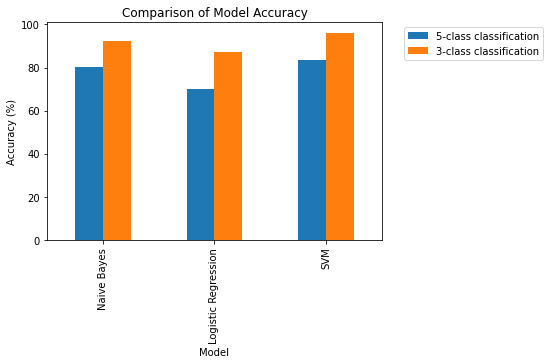

In [100]:
df_compare_model = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    '5-class classification': [80.35487436688499, 70.2387826593855, 83.35258112946067],
    '3-class classification': [92.5288304489136, 87.29727946150166, 96.0935222916976]
})
  
df_compare_model.plot(x="Model", y=["5-class classification", "3-class classification"], kind="bar")
ax = plt.gca()
#ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.xlabel('Model'); plt.ylabel('Accuracy (%)'); plt.title('Comparison of Model Accuracy');
plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig("model accuracy compare.png",
                    format='png',dpi=150, bbox_inches='tight')

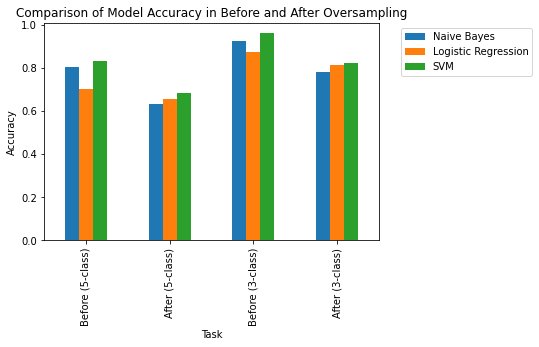

In [91]:
#Visualising results

df_compare_model2 = pd.DataFrame({
    'Task': ['Before (5-class)', 'After (5-class)', 'Before (3-class)', 'After (3-class)'],
    'Naive Bayes': [0.804, 0.631, 0.925, 0.783],
    'Logistic Regression': [0.702, 0.656, 0.873, 0.815],
    'SVM':[0.834, 0.682, 0.961, 0.822]
})
  
df_compare_model2.plot(x="Task", y=["Naive Bayes", "Logistic Regression", "SVM"], kind="bar")
ax = plt.gca()
#ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.xlabel('Task'); plt.ylabel('Accuracy'); plt.title('Comparison of Model Accuracy in Before and After Oversampling');
plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig("model accuracy compare2.png",
                    format='png',dpi=150, bbox_inches='tight')

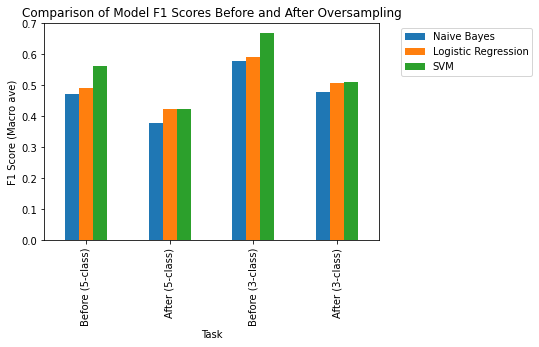

In [92]:
#Visualising results

df_compare_model3 = pd.DataFrame({
    'Task': ['Before (5-class)', 'After (5-class)', 'Before (3-class)', 'After (3-class)'],
    'Naive Bayes': [0.471, 0.377, 0.578, 0.478],
    'Logistic Regression': [0.491, 0.423, 0.590, 0.508],
    'SVM':[0.561, 0.422, 0.668, 0.510]
})
  
df_compare_model3.plot(x="Task", y=["Naive Bayes", "Logistic Regression", "SVM"], kind="bar")
ax = plt.gca()
#ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.xlabel('Task'); plt.ylabel('F1 Score (Macro ave)'); plt.title('Comparison of Model F1 Scores Before and After Oversampling');
plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig("model f1 compare.png",
                    format='png',dpi=150, bbox_inches='tight')